In [11]:
import cv2
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


This image is: <class 'numpy.ndarray'> with dimensions: (590, 1640, 3)


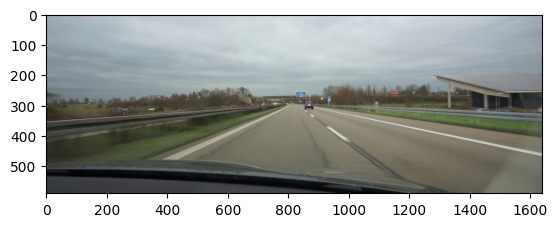

In [12]:
# reading in an image
image = mpimg.imread('demo.jpg')
# printing out some stats and plotting the image
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)
plt.show()

In [13]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)

    match_mask_color = 255

    cv2.fillPoly(mask, vertices, match_mask_color)

    masked_image = cv2.bitwise_and(img, mask)
    
    return masked_image


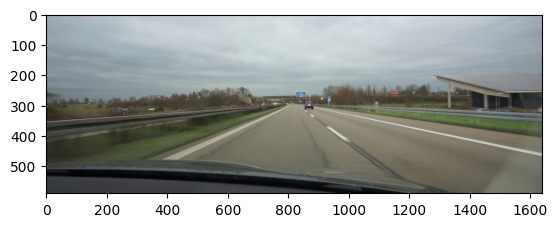

In [14]:
height = 590
width = 1640

region_of_interest_vertices = [(0,400),(width / 2, height / 2),(width, 400), (width, height),  (0, height) ]

image = mpimg.imread('demo.jpg')

plt.figure()
plt.imshow(image)

plt.show()

[[ 830  296 1639  468]]


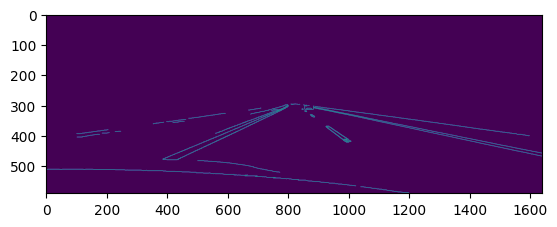

In [20]:
import math

# Convert to grayscale here.
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Call Canny Edge Detection here.
cannyed_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(cannyed_image, np.array([region_of_interest_vertices], np.int32),)

lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)
print(lines[0])

left_line_x = []
left_line_y = []
right_line_x = []
right_line_y = []
for line in lines:
    for x1, y1, x2, y2 in line:
        slope = (y2 - y1) / (x2 - x1) # <-- Calculating the slope.
        if math.fabs(slope) < 0.5: # <-- Only consider extreme slope
            continue
        if slope <= 0: # <-- If the slope is negative, left group.
            left_line_x.extend([x1, x2])
            left_line_y.extend([y1, y2])
        else: # <-- Otherwise, right group.
            right_line_x.extend([x1, x2])
            right_line_y.extend([y1, y2])

min_y = image.shape[0] * (3 / 5) # <-- Just below the horizon
max_y = image.shape[0] # <-- The bottom of the image

poly_left = np.poly1d(np.polyfit(
    left_line_y,
    left_line_x,
    deg=1
))
left_x_start = int(poly_left(max_y))
left_x_end = int(poly_left(min_y))

poly_right = np.poly1d(np.polyfit(
    right_line_y,
    right_line_x,
    deg=1
))
right_x_start = int(poly_right(max_y))
right_x_end = int(poly_right(min_y))

plt.figure()
plt.imshow(cropped_image)
plt.show()

In [18]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    # If there are no lines to draw, exit.
    if lines is None:
        return
    # Make a copy of the original image.
    img = np.copy(img)
    # Create a blank image that matches the original in size.
    line_img = np.zeros(
        (
            img.shape[0],
            img.shape[1],
            3
        ),
        dtype=np.uint8,
    )
    # Loop over all lines and draw them on the blank image.
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
    # Merge the image with the lines onto the original.
    img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
    # Return the modified image.
    return img

In [21]:
image = mpimg.imread('demo.jpg')

line_image = draw_lines(
    image,
    [[
        [left_x_start, max_y, left_x_end, min_y],
        [right_x_start, max_y, right_x_end, min_y],
    ]],
    thickness=5,
)

plt.figure()
plt.imshow(line_image)
plt.show()

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt2'. Sequence item with index 1 has a wrong type
>  - Can't parse 'pt2'. Sequence item with index 1 has a wrong type
